### Examining the covid cases on the basis of their geographical location in Indian Subcontinent

### Importing the required dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def open_file():
    df = pd.read_csv('Output/dataset_filtered.csv')
    return df
df = open_file()
df.head(7)

C:\Users\anasn\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Serial Id,Day Id,Status Day Id,Date Announced,Age Bracket,Gender,Detected State,Current Status,Status Change Date,Num Cases
0,1,0,0.0,02/02/2020,NaN,NaN,Kerala,Recovered,14/02/2020,1.0
1,2,0,0.0,03/02/2020,NaN,NaN,Kerala,Recovered,14/02/2020,1.0
2,3,1,14.0,02/03/2020,45,M,Delhi,Recovered,15/03/2020,1.0
3,4,1,1.0,02/03/2020,24,M,Telangana,Recovered,02/03/2020,1.0
4,5,3,28.0,04/03/2020,55,NaN,Haryana,Recovered,29/03/2020,1.0
5,6,3,28.0,04/03/2020,55,NaN,Haryana,Recovered,29/03/2020,1.0
6,7,3,28.0,04/03/2020,55,NaN,Haryana,Recovered,29/03/2020,1.0


### List of states and union territories present in the dataset

In [4]:
df['Detected State'].unique()

array(['Kerala', 'Delhi', 'Telangana', 'Haryana', 'Uttar Pradesh',
       'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir', 'Karnataka',
       'Maharashtra', 'Punjab', 'Rajasthan', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Goa',
       'Andaman and Nicobar Islands', 'Jharkhand', 'Assam',
       'Arunachal Pradesh', nan, 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'State Unassigned',
       'Sikkim', 'Nagaland', 'Lakshadweep'], dtype=object)

### Division of India states into seven geographic regions:

#### Classified on the basis of major landforms in the state
[Learn more](https://www.cs.mcgill.ca/~rwest/wikispeedia/wpcd/wp/g/Geography_of_India.htm)


In [5]:
MOUNTAIN = set([
    'Jammu and Kashmir', 'Himachal Pradesh', 'Uttarakhand', 'Ladakh',
    'Manipur', 'Mizoram', 'Arunachal Pradesh', 'Tripura',  'Meghalaya',
    'Sikkim', 'Nagaland'
])

INDO_GANGETIC_PLAIN = set([
    'Delhi', 'Haryana', 'Uttar Pradesh', 'Punjab', 'Bihar', 'Jharkhand',
    'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Assam', 
])

THAR_DESERT = set([
    'Rajasthan'
])

CENTRAL_HIGHLANDS = set([
    'Telangana', 'Odisha', 'Maharashtra', 'Madhya Pradesh',
])

EAST_COAST = set([
    'Tamil Nadu', 'Andhra Pradesh', 'Puducherry',
])

WEST_COAST = set([
    'Kerala', 'Karnataka', 'Gujarat', 'Goa',
])

BORDERING_ISLANDS = set([
    'Andaman and Nicobar Islands', 
    'Dadra and Nagar Haveli and Daman and Diu',
    'Lakshadweep'
])

### Total Population Projected for 2018 by Aadhar - Unique Identification Authority of India on 28th February 2019 (3). 
[Learn More](https://www.populationu.com/india-population)

In [6]:
POPULATION = {
    'Jammu and Kashmir': 14046258, 'Himachal Pradesh': 7316708,
    'Uttarakhand': 11090425 , 'Ladakh': 307204,
    'Manipur': 3008546, 'Mizoram': 1205974,
    'Arunachal Pradesh': 1528296, 'Tripura': 4057847,
    'Meghalaya': 3276323, 'Sikkim': 671720,
    'Nagaland': 2189297, 'Delhi': 18802494,
    'Haryana': 27388008, 'Uttar Pradesh': 228959599,
    'Punjab': 29611935, 'Bihar': 119461013,
    'Jharkhand': 37329128, 'West Bengal': 97694960,
    'Chandigarh': 1182104, 'Chhattisgarh': 28566990,
    'Assam': 34586234, 'Rajasthan': 78230816,
    'Telangana': 38472769, 'Odisha': 45429399,
    'Maharashtra': 120837347, 'Madhya Pradesh': 82342793,
    'Tamil Nadu': 76481545, 'Andhra Pradesh': 52883163,
    'Puducherry': 1397707,'Kerala': 35330888,
    'Karnataka': 66165886, 'Gujarat': 63907200,
    'Goa': 1542750, 'Andaman and Nicobar Islands': 426251, 
    'Dadra and Nagar Haveli and Daman and Diu': 384954,
    'Lakshadweep': 72210
}

### Total Number of covid cases in each of these states

In [7]:
def total_covid():
    temp = dict()
    df = open_file()
    for i in POPULATION:
        req_col = df[(df['Detected State'] == i) & (df['Current Status'] == 'Hospitalized')]  # .shape[0] 
        temp[i] = req_col['Num Cases'].sum()
        
    return temp

TOTAL_COVID = total_covid()
# TOTAL_COVID

C:\Users\anasn\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Ratio of total number of cases and total population times 1000 for each state

In [8]:
def ratio():
    '''
    Total Cases / Total Population * 1000 for each state 
    '''
    temp = dict()
    for i in POPULATION:
        temp[i] = TOTAL_COVID[i]/POPULATION[i] * 1000
        
    return temp

RATIO = ratio()
print(RATIO)

{'Jammu and Kashmir': 20.835086469293103, 'Himachal Pradesh': 24.746101662113617, 'Uttarakhand': 27.717513079976644, 'Ladakh': 60.8618377364878, 'Manipur': 19.867072000893454, 'Mizoram': 12.680207035972582, 'Arunachal Pradesh': 19.920879201411243, 'Tripura': 14.066326305550701, 'Meghalaya': 12.601016444349352, 'Sikkim': 27.051450008932292, 'Nagaland': 10.1571417674258, 'Delhi': 67.6900628182623, 'Haryana': 26.49108325074244, 'Uttar Pradesh': 6.9464831653553, 'Punjab': 18.284722021711854, 'Bihar': 5.530239392830195, 'Jharkhand': 8.39068622229804, 'West Bengal': 14.0250428476556, 'Chandigarh': 48.24617800125877, 'Chhattisgarh': 31.826839299485176, 'Assam': 12.9900237186853, 'Rajasthan': 11.398411081382559, 'Telangana': 14.589357995001608, 'Odisha': 17.709457261365046, 'Maharashtra': 45.5368736289783, 'Madhya Pradesh': 8.988752664729262, 'Tamil Nadu': 29.01288147356333, 'Andhra Pradesh': 31.537750493479372, 'Puducherry': 78.21167097252858, 'Kerala': 73.52289022568581, 'Karnataka': 38.1253

### Plot of the above ratio 

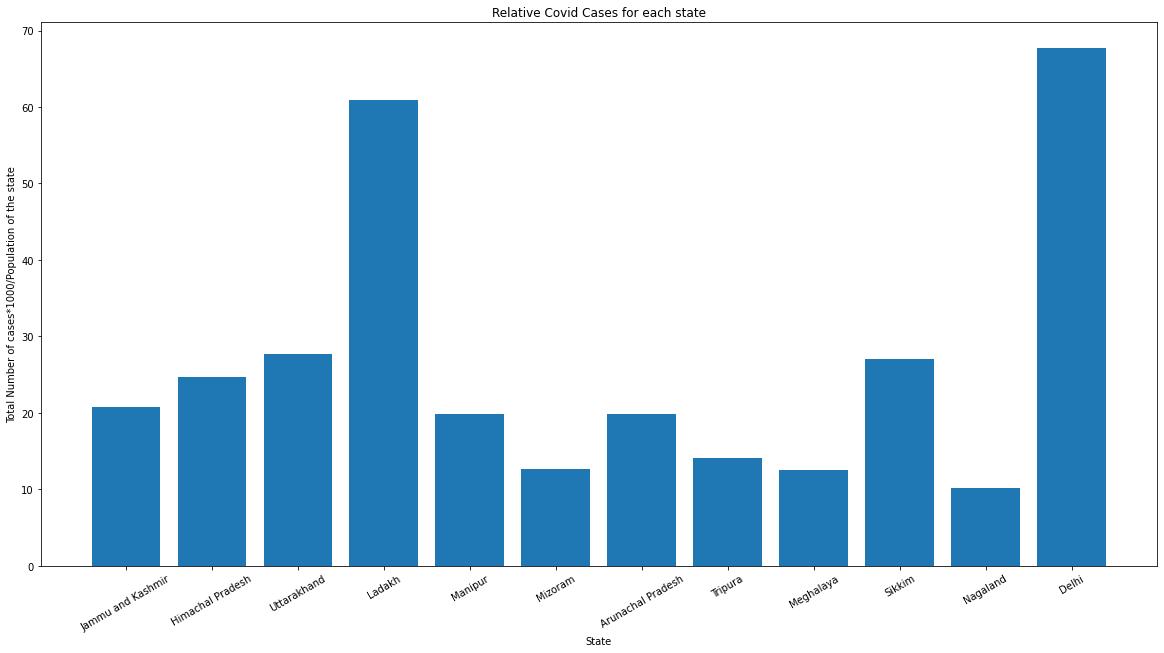

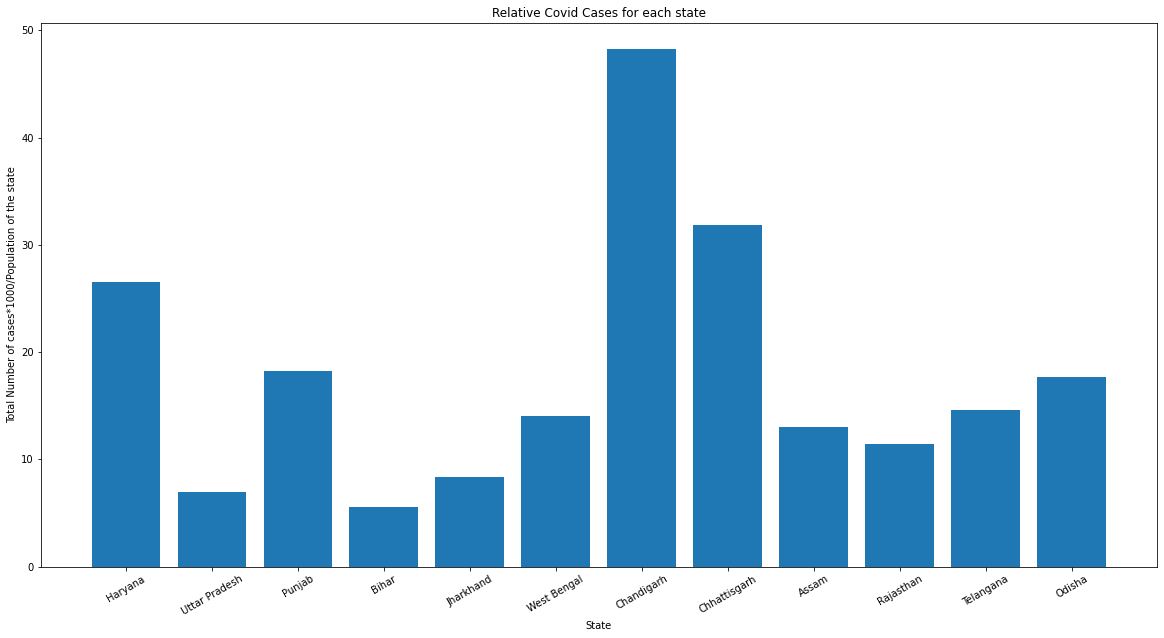

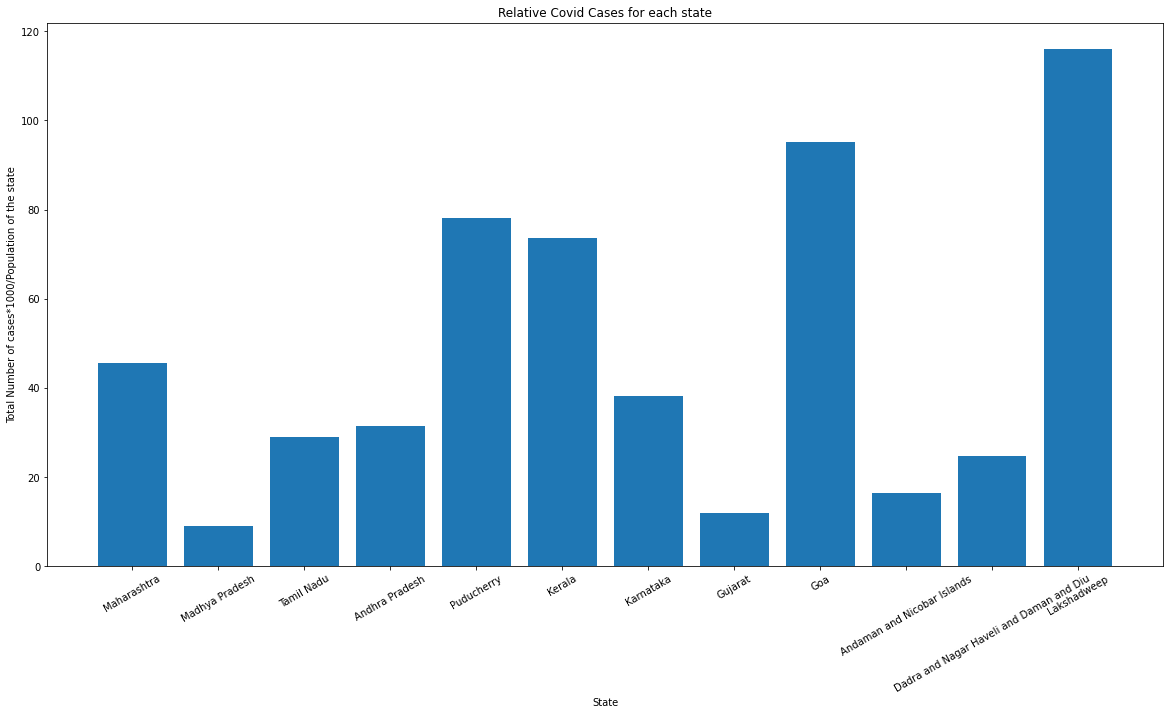

In [21]:
def plot_relative_cases():

    length = len(POPULATION)
    
    plt.figure(figsize=(20, 10))
    plt.title("Relative Covid Cases for each state")
    plt.xlabel("State")
    plt.ylabel("Total Number of cases*1000/Population of the state")
    states1 = list(RATIO.keys())[:length//3]
    values1 = list(RATIO.values())[:length//3]
    plt.bar(states1, values1)    
    plt.xticks(rotation=30)
    plt.show()
    
    plt.figure(figsize=(20, 10))
    plt.title("Relative Covid Cases for each state")
    plt.xlabel("State")
    plt.ylabel("Total Number of cases*1000/Population of the state")
    states1 = list(RATIO.keys())[length//3:length*2//3]
    values1 = list(RATIO.values())[length//3:length*2//3]
    plt.xticks(rotation=30)
    plt.bar(states1, values1)            
    plt.show()
    
    plt.figure(figsize=(20, 10))
    plt.title("Relative Covid Cases for each state")
    plt.xlabel("State")
    plt.ylabel("Total Number of cases*1000/Population of the state")
    states1 = list(RATIO.keys())[length*2//3:]
    values1 = list(RATIO.values())[length*2//3:]
    plt.bar(states1, values1)    
    plt.xticks(rotation=30)
    plt.show()

plot_relative_cases()

### Total population for each landform

In [10]:
def population_geography(geography):
    '''Total population for the above geography'''
    
    return sum(POPULATION[location] for location in geography)


GEOGRAPHY_POPULATION = {
    'Mountain': population_geography(MOUNTAIN),
    'Desert': population_geography(THAR_DESERT),
    'Northern Plains': population_geography(INDO_GANGETIC_PLAIN),
    'Central Highlands': population_geography(CENTRAL_HIGHLANDS),
    'East Coast': population_geography(EAST_COAST),
    'West Coast': population_geography(WEST_COAST),
    'Islands': population_geography(BORDERING_ISLANDS)    
}

### Total number of cases for each landform

In [11]:
def cases_geography(geography):
    '''Total covid cases for the above geography'''
    
    return sum(TOTAL_COVID[location] for location in geography)

GEOGRAPHY_CASES = {
    'Mountain': cases_geography(MOUNTAIN),
    'Desert': cases_geography(THAR_DESERT),
    'Northern Plains': cases_geography(INDO_GANGETIC_PLAIN),
    'Central Highlands': cases_geography(CENTRAL_HIGHLANDS),
    'East Coast': cases_geography(EAST_COAST),
    'West Coast': cases_geography(WEST_COAST),
    'Islands': cases_geography(BORDERING_ISLANDS)
}

### Graph for number of cases / population for each landform

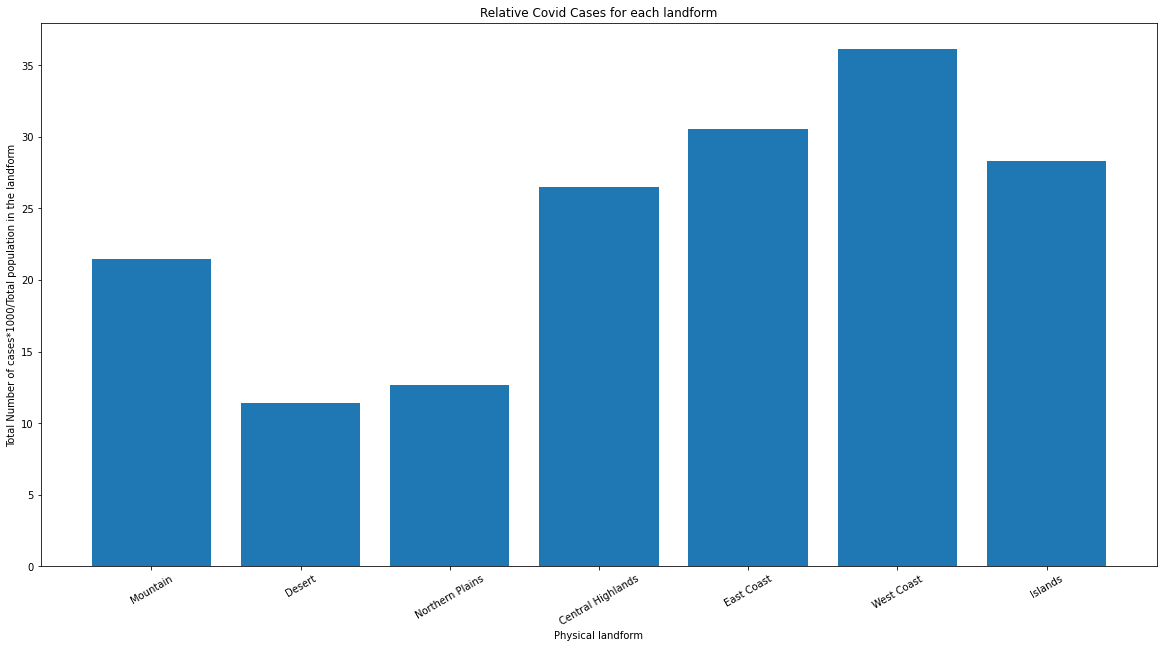

In [22]:
def plot_relative_case_geography():
    
    def ratio_geography():
        temp = dict()
        for i in GEOGRAPHY_POPULATION:
            temp[i] = GEOGRAPHY_CASES[i]/GEOGRAPHY_POPULATION[i] * 1000
        
        return temp

    RATIO_GEOGRAPHY = ratio_geography()
    
    plt.figure(figsize=(20, 10))
    plt.title("Relative Covid Cases for each landform")
    plt.xlabel("Physical landform")
    plt.ylabel("Total Number of cases*1000/Total population in the landform")
    states1 = list(RATIO_GEOGRAPHY.keys())
    values1 = list(RATIO_GEOGRAPHY.values())
    plt.bar(states1, values1)    
    plt.xticks(rotation=30)
    plt.show()
    
plot_relative_case_geography()